# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [5]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [6]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [7]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [8]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -1.002422
c    0.545598
d    0.592333
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [9]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [11]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [12]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.301895
2018-11-20 14:45:00     9.389661
2018-11-21 14:45:00     9.877714
2018-11-22 14:45:00     8.696631
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.301895
2018-11-20 14:45:00     9.389661
2018-11-21 14:45:00     9.877714
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [13]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [14]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,0.530129,-0.391963,-0.306714,0.708219
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,-0.014435
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,0.767232
2018-11-19 17:45:00,-1.403978,-0.681634,1.127881,1.516371
2018-11-19 18:45:00,2.081507,-0.108040,-1.853149,-0.776745
2018-11-19 19:45:00,0.259483,-0.097537,1.553459,0.370264
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,0.371019
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,-0.069283
2018-11-19 22:45:00,0.811718,-0.258071,1.241931,-1.447128
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,0.519004


or by means of a dictionary:


In [16]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [17]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [18]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,0.530129,-0.391963,-0.306714,0.708219
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,-0.014435
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,0.767232
2018-11-19 17:45:00,-1.403978,-0.681634,1.127881,1.516371
2018-11-19 18:45:00,2.081507,-0.108040,-1.853149,-0.776745


In [19]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,0.371019
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,-0.069283
2018-11-19 22:45:00,0.811718,-0.258071,1.241931,-1.447128
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,0.519004


In [20]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values

array([[ 0.53012858, -0.39196329, -0.30671379,  0.7082188 ],
       [ 1.49246513,  0.55042469, -0.60072086, -0.01443539],
       [-0.13994796,  0.1358688 ,  0.44659835,  0.767232  ],
       [-1.403978  , -0.68163413,  1.12788105,  1.51637147],
       [ 2.08150673, -0.10803983, -1.85314855, -0.77674496],
       [ 0.2594831 , -0.09753685,  1.55345877,  0.37026366],
       [-1.24293365,  0.67045923, -2.24678597,  0.37101894],
       [ 1.15149649,  0.22392115, -1.1517239 , -0.0692832 ],
       [ 0.81171829, -0.25807145,  1.24193053, -1.44712815],
       [ 0.76389556,  0.51301533, -0.77819048,  0.51900445]])

In [23]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.430383,0.055644,-0.256741,0.194452
std,1.113562,0.442135,1.318131,0.833875
min,-1.403978,-0.681634,-2.246786,-1.447128
25%,-0.040090,-0.220564,-1.058341,-0.055571
50%,0.647012,0.019166,-0.453717,0.370641
75%,1.066552,0.440742,0.957560,0.660915
max,2.081507,0.670459,1.553459,1.516371


In [24]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,0.530129,1.492465,-0.139948,-1.403978,2.081507,0.259483,-1.242934,1.151496,0.811718,0.763896
B,-0.391963,0.550425,0.135869,-0.681634,-0.108040,-0.097537,0.670459,0.223921,-0.258071,0.513015
C,-0.306714,-0.600721,0.446598,1.127881,-1.853149,1.553459,-2.246786,-1.151724,1.241931,-0.778190
D,0.708219,-0.014435,0.767232,1.516371,-0.776745,0.370264,0.371019,-0.069283,-1.447128,0.519004


In [25]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,0.708219,-0.306714,-0.391963,0.530129
2018-11-19 15:45:00,-0.014435,-0.600721,0.550425,1.492465
2018-11-19 16:45:00,0.767232,0.446598,0.135869,-0.139948
2018-11-19 17:45:00,1.516371,1.127881,-0.681634,-1.403978
2018-11-19 18:45:00,-0.776745,-1.853149,-0.108040,2.081507
2018-11-19 19:45:00,0.370264,1.553459,-0.097537,0.259483
2018-11-19 20:45:00,0.371019,-2.246786,0.670459,-1.242934
2018-11-19 21:45:00,-0.069283,-1.151724,0.223921,1.151496
2018-11-19 22:45:00,-1.447128,1.241931,-0.258071,0.811718
2018-11-19 23:45:00,0.519004,-0.778190,0.513015,0.763896


In [26]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,0.371019
2018-11-19 18:45:00,2.081507,-0.108040,-1.853149,-0.776745
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,-0.069283
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,0.519004
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,-0.014435
2018-11-19 14:45:00,0.530129,-0.391963,-0.306714,0.708219
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,0.767232
2018-11-19 17:45:00,-1.403978,-0.681634,1.127881,1.516371
2018-11-19 22:45:00,0.811718,-0.258071,1.241931,-1.447128
2018-11-19 19:45:00,0.259483,-0.097537,1.553459,0.370264


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [27]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    0.530129
2018-11-19 15:45:00    1.492465
2018-11-19 16:45:00   -0.139948
2018-11-19 17:45:00   -1.403978
2018-11-19 18:45:00    2.081507
2018-11-19 19:45:00    0.259483
2018-11-19 20:45:00   -1.242934
2018-11-19 21:45:00    1.151496
2018-11-19 22:45:00    0.811718
2018-11-19 23:45:00    0.763896
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    0.530129
2018-11-19 15:45:00    1.492465
2018-11-19 16:45:00   -0.139948
2018-11-19 17:45:00   -1.403978
2018-11-19 18:45:00    2.081507
2018-11-19 19:45:00    0.259483
2018-11-19 20:45:00   -1.242934
2018-11-19 21:45:00    1.151496
2018-11-19 22:45:00    0.811718
2018-11-19 23:45:00    0.763896
Freq: H, Name: A, dtype: float64


In [28]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  0.530129 -0.391963 -0.306714  0.708219
2018-11-19 15:45:00  1.492465  0.550425 -0.600721 -0.014435
2018-11-19 16:45:00 -0.139948  0.135869  0.446598  0.767232
                            A         B         C         D
2018-11-19 14:45:00  0.530129 -0.391963 -0.306714  0.708219
2018-11-19 15:45:00  1.492465  0.550425 -0.600721 -0.014435
2018-11-19 16:45:00 -0.139948  0.135869  0.446598  0.767232


### Selection by label

In [66]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A          0.000000
B         -0.391963
C         -0.306714
D          5.000000
E          0.000000
E prime    0.000000
cosine     1.000000
Name: 2018-11-19 14:45:00, dtype: float64

In [30]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,0.530129,-0.391963
2018-11-19 15:45:00,1.492465,0.550425
2018-11-19 16:45:00,-0.139948,0.135869
2018-11-19 17:45:00,-1.403978,-0.681634
2018-11-19 18:45:00,2.081507,-0.108040
2018-11-19 19:45:00,0.259483,-0.097537
2018-11-19 20:45:00,-1.242934,0.670459
2018-11-19 21:45:00,1.151496,0.223921
2018-11-19 22:45:00,0.811718,-0.258071
2018-11-19 23:45:00,0.763896,0.513015


In [31]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,2.081507,-0.108040
2018-11-19 19:45:00,0.259483,-0.097537
2018-11-19 20:45:00,-1.242934,0.670459


In [32]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.4924651345660473
1.4924651345660473


### Selecting by position

In [33]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -1.403978
B   -0.681634
C    1.127881
D    1.516371
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -1.403978 -0.681634
2018-11-19 18:45:00  2.081507 -0.108040


In [34]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,1.492465,-0.600721
2018-11-19 16:45:00,-0.139948,0.446598
2018-11-19 18:45:00,2.081507,-1.853149


In [35]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  1.492465  0.550425 -0.600721 -0.014435
2018-11-19 16:45:00 -0.139948  0.135869  0.446598  0.767232 

                            B         C
2018-11-19 14:45:00 -0.391963 -0.306714
2018-11-19 15:45:00  0.550425 -0.600721
2018-11-19 16:45:00  0.135869  0.446598
2018-11-19 17:45:00 -0.681634  1.127881
2018-11-19 18:45:00 -0.108040 -1.853149
2018-11-19 19:45:00 -0.097537  1.553459
2018-11-19 20:45:00  0.670459 -2.246786
2018-11-19 21:45:00  0.223921 -1.151724
2018-11-19 22:45:00 -0.258071  1.241931
2018-11-19 23:45:00  0.513015 -0.778190


In [36]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.5504246880148159

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [37]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,-0.014435
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,0.767232
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,0.371019
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,-0.069283
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,0.519004


In [38]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,0.530129,NaN,NaN,0.708219
2018-11-19 15:45:00,1.492465,0.550425,NaN,NaN
2018-11-19 16:45:00,NaN,0.135869,0.446598,0.767232
2018-11-19 17:45:00,NaN,NaN,1.127881,1.516371
2018-11-19 18:45:00,2.081507,NaN,NaN,NaN
2018-11-19 19:45:00,0.259483,NaN,1.553459,0.370264
2018-11-19 20:45:00,NaN,0.670459,NaN,0.371019
2018-11-19 21:45:00,1.151496,0.223921,NaN,NaN
2018-11-19 22:45:00,0.811718,NaN,1.241931,NaN
2018-11-19 23:45:00,0.763896,0.513015,NaN,0.519004


### Setting

Combination of selection and setting of values

In [39]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [40]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.391963,-0.306714,5,0.0,0,1.000000
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,5,1.0,4,0.999848
2018-11-19 17:45:00,-1.403978,-0.681634,1.127881,5,1.5,6,0.999657
2018-11-19 18:45:00,2.081507,-0.108040,-1.853149,5,2.0,8,0.999391
2018-11-19 19:45:00,0.259483,-0.097537,1.553459,5,2.5,10,0.999048
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,5,3.0,12,0.998630
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,5,3.5,14,0.998135
2018-11-19 22:45:00,0.811718,-0.258071,1.241931,5,4.0,16,0.997564
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,5,4.5,18,0.996917


In [41]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.391963,-0.306714,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-1.492465,-0.550425,-0.600721,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.139948,-0.135869,-0.446598,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-1.403978,-0.681634,-1.127881,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-2.081507,-0.108040,-1.853149,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.259483,-0.097537,-1.553459,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-1.242934,-0.670459,-2.246786,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.151496,-0.223921,-1.151724,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.811718,-0.258071,-1.241931,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.763896,-0.513015,-0.778190,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [42]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-0.391963,-0.306714,5,0.0,1.000000
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,5,0.5,0.999962
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,5,1.0,0.999848
2018-11-19 17:45:00,-1.403978,-0.681634,1.127881,5,1.5,0.999657
2018-11-19 18:45:00,2.081507,-0.108040,-1.853149,5,2.0,0.999391
2018-11-19 19:45:00,0.259483,-0.097537,1.553459,5,2.5,0.999048
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,5,3.0,0.998630
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,5,3.5,0.998135
2018-11-19 22:45:00,0.811718,-0.258071,1.241931,5,4.0,0.997564
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,5,4.5,0.996917


In [43]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.391963,-0.306714,5,0.0,0,1.000000
2018-11-19 19:45:00,0.259483,-0.097537,1.553459,5,2.5,10,0.999048
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,5,3.0,12,0.998630
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,5,3.5,14,0.998135
2018-11-19 22:45:00,0.811718,-0.258071,1.241931,5,4.0,16,0.997564
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,5,4.5,18,0.996917


In [44]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.391963,-0.306714,5,0.0,0,1.000000
2018-11-19 15:45:00,1.492465,0.550425,-0.600721,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.139948,0.135869,0.446598,5,1.0,4,0.999848
2018-11-19 17:45:00,-1.403978,-0.681634,1.127881,5,1.5,6,0.999657
2018-11-19 18:45:00,2.081507,-0.108040,-1.853149,5,2.0,8,0.999391
2018-11-19 19:45:00,0.259483,-0.097537,1.553459,5,2.5,10,0.999048
2018-11-19 20:45:00,-1.242934,0.670459,-2.246786,5,3.0,12,0.998630
2018-11-19 21:45:00,1.151496,0.223921,-1.151724,5,3.5,14,0.998135
2018-11-19 23:45:00,0.763896,0.513015,-0.778190,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [45]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,1.492465,0.550425,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,0.135869,0.446598,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,1.127881,5,1.5,6.0,0.999657
2018-11-19 18:45:00,2.081507,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.259483,NaN,1.553459,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,0.670459,NaN,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.151496,0.223921,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.811718,NaN,1.241931,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.763896,0.513015,NaN,5,4.5,18.0,0.996917


In [46]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [47]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,True,True,True,False,True,True,False
2018-11-19 15:45:00,False,False,True,False,False,False,False
2018-11-19 16:45:00,True,False,False,False,False,False,False
2018-11-19 17:45:00,True,True,False,False,False,False,False
2018-11-19 18:45:00,False,True,True,False,False,False,False
2018-11-19 19:45:00,False,True,False,False,False,False,False
2018-11-19 20:45:00,True,False,True,False,False,False,False
2018-11-19 21:45:00,False,False,True,False,False,False,False
2018-11-19 22:45:00,False,True,False,False,False,False,False
2018-11-19 23:45:00,False,False,True,False,False,False,False


In [48]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,1.492465,0.550425,0.000000,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.000000,0.135869,0.446598,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.000000,0.000000,1.127881,5,1.5,6.0,0.999657
2018-11-19 18:45:00,2.081507,0.000000,0.000000,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.259483,0.000000,1.553459,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.000000,0.670459,0.000000,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.151496,0.223921,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.811718,0.000000,1.241931,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.763896,0.513015,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [49]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,1.492465,0.550425,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.492465,0.135869,0.446598,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.492465,0.135869,1.127881,5,1.5,6.0,0.999657
2018-11-19 18:45:00,2.081507,0.135869,1.127881,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.259483,0.135869,1.553459,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.259483,0.670459,1.553459,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.151496,0.223921,1.553459,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.811718,0.223921,1.241931,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.763896,0.513015,1.241931,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [50]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.377371
B          0.055644
C         -0.256741
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.757332
2018-11-19 15:45:00    1.420304
2018-11-19 16:45:00    1.634624
2018-11-19 17:45:00    1.791704
2018-11-19 18:45:00    2.302816
2018-11-19 19:45:00    2.887779
2018-11-19 20:45:00    2.597053
2018-11-19 21:45:00    3.388833
2018-11-19 22:45:00    3.970449
2018-11-19 23:45:00    4.142234
Freq: H, dtype: float64 



In [51]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.391963,-0.306714,5,0.0,0,1.000000
2018-11-19 15:45:00,1.492465,0.158461,-0.907435,10,0.5,2,1.999962
2018-11-19 16:45:00,1.352517,0.294330,-0.460836,15,1.5,6,2.999810
2018-11-19 17:45:00,-0.051461,-0.387304,0.667045,20,3.0,12,3.999467
2018-11-19 18:45:00,2.030046,-0.495344,-1.186104,25,5.0,20,4.998858
2018-11-19 19:45:00,2.289529,-0.592881,0.367355,30,7.5,30,5.997906
2018-11-19 20:45:00,1.046595,0.077579,-1.879431,35,10.5,42,6.996536
2018-11-19 21:45:00,2.198092,0.301500,-3.031155,40,14.0,56,7.994670
2018-11-19 22:45:00,3.009810,0.043428,-1.789224,45,18.0,72,8.992234
2018-11-19 23:45:00,3.773706,0.556444,-2.567415,50,22.5,90,9.989152


In [52]:
df.apply(lambda x: x.max() - x.min())

A           3.485485
B           1.352093
C           3.800245
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [53]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -0.391963
2018-11-19 15:45:00    2.042890
2018-11-19 16:45:00   -0.004079
2018-11-19 17:45:00   -2.085612
2018-11-19 18:45:00    1.973467
2018-11-19 19:45:00    0.161946
2018-11-19 20:45:00   -0.572474
2018-11-19 21:45:00    1.375418
2018-11-19 22:45:00    0.553647
2018-11-19 23:45:00    1.276911
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [69]:
file_name="../data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [70]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [72]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

KeyboardInterrupt: 

In [73]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [58]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.923694,-0.436065,-0.968666,1.432578
1,1.576869,0.692996,-0.717590,-0.705052
2,0.990283,-0.005057,-0.099406,-0.563064
3,-0.946599,0.285351,0.523907,3.204060
4,0.849876,0.467363,-0.007762,0.607235
5,-0.705238,-0.753246,-1.751803,-1.376097
6,1.657481,-0.502636,0.098726,-0.908365
7,1.555733,-0.314292,1.473145,-0.183191
8,1.598548,-2.073127,-0.603184,-0.625706
9,-1.377695,-0.364080,-0.658165,-0.089472


In [59]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.923694 -0.436065 -0.968666  1.432578
 1  1.576869  0.692996 -0.717590 -0.705052
 2  0.990283 -0.005057 -0.099406 -0.563064,
           0         1         2         3
 3 -0.946599  0.285351  0.523907  3.204060
 4  0.849876  0.467363 -0.007762  0.607235
 5 -0.705238 -0.753246 -1.751803 -1.376097
 6  1.657481 -0.502636  0.098726 -0.908365,
           0         1         2         3
 7  1.555733 -0.314292  1.473145 -0.183191
 8  1.598548 -2.073127 -0.603184 -0.625706
 9 -1.377695 -0.364080 -0.658165 -0.089472]

In [60]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.923694,-0.436065,-0.968666,1.432578
1,1.576869,0.692996,-0.717590,-0.705052
2,0.990283,-0.005057,-0.099406,-0.563064
3,-0.946599,0.285351,0.523907,3.204060
4,0.849876,0.467363,-0.007762,0.607235
5,-0.705238,-0.753246,-1.751803,-1.376097
6,1.657481,-0.502636,0.098726,-0.908365
7,1.555733,-0.314292,1.473145,-0.183191
8,1.598548,-2.073127,-0.603184,-0.625706
9,-1.377695,-0.364080,-0.658165,-0.089472


In [61]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.923694,-0.436065,-0.968666,1.432578
1,1.576869,0.692996,-0.717590,-0.705052
2,0.990283,-0.005057,-0.099406,-0.563064
3,-0.946599,0.285351,0.523907,3.204060
4,0.849876,0.467363,-0.007762,0.607235
5,-0.705238,-0.753246,-1.751803,-1.376097
6,1.657481,-0.502636,0.098726,-0.908365
7,1.555733,-0.314292,1.473145,-0.183191
8,1.598548,-2.073127,-0.603184,-0.625706
9,-1.377695,-0.364080,-0.658165,-0.089472


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [62]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [63]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.034715,0.416618
1,bar,one,-1.116653,-0.216632
2,foo,two,2.802100,-1.124133
3,bar,three,0.626062,0.602009
4,foo,two,-0.141973,0.183393
5,bar,two,-0.569172,-0.342568
6,foo,one,-1.031403,-2.201422
7,foo,three,0.456536,1.087053


In [64]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-1.059763,0.042809
foo,1.050545,-1.638492


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [75]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -1.322240
       two      -2.049415
baz    one      -1.097881
       two      -1.113479
foo    one       0.420558
       two       0.222999
qux    one      -0.828887
       two       0.062541
dtype: float64


In [76]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.116653 -0.216632
    three  0.626062  0.602009
    two   -0.569172 -0.342568
foo one   -2.066118 -1.784805
    three  0.456536  1.087053
    two    2.660126 -0.940740

In [77]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.116653
            D   -0.216632
     three  C    0.626062
            D    0.602009
     two    C   -0.569172
            D   -0.342568
foo  one    C   -2.066118
            D   -1.784805
     three  C    0.456536
            D    1.087053
     two    C    2.660126
            D   -0.940740
dtype: float64

## Plotting

Just a preview, more on the next lab class!

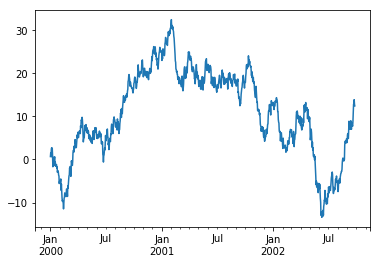

In [80]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

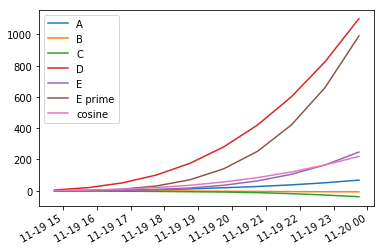

In [82]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')